## 1. Introduction
<p>Being one of the best Danish contribution to the human civilization, Lego is with us since 1949. </p>

<p>In this project, I will analyze a dataset on every single lego block that has ever been manufactured.</p>
<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/project_10/datasets/lego-bricks.jpeg" alt="lego" width="500" /></p>

![](datasets/lego-bricks.JPEG)
![lego-bricks.jpeg](attachment:datasets/lego-bricks.JPEG)

## 2. Reading Data
<p>A comprehensive database of lego blocks is provided by <a href="https://rebrickable.com/downloads/">Rebrickable</a>. The data is available as csv files and the schema is shown below.</p>
<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/project_10/datasets/downloads_schema.png" alt="schema"></p>
<p>I will start by reading in the colors data to get a sense of the diversity of lego sets.</p>

In [2]:
# Import modules
import pandas as pd

# Read colors data
colors = pd.read_csv('datasets/colors.csv')

# Print the first few rows
colors.head()

,id,name,rgb,is_trans
0,-1,[Unknown],0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


## 3. Exploring Colors
<p>From the <code>colors</code> data, it's time to explore it. I will start by finding the number of colors available.</p>

In [3]:
# How many distinct colors are available?
num_colors = colors.name.count()
num_colors

184

## 4. Transparent Colors in Lego Sets
<p>The <code>colors</code> data has a column named <code>is_trans</code> that indicates whether a color is transparent or not. It would be interesting to explore the distribution of transparent vs. non-transparent colors.</p>

In [4]:
# colors_summary: Distribution of colors based on transparency
colors_summary = colors.groupby("is_trans").count()
colors_summary

,id,name,rgb
is_trans,,,
f,151,151,151
t,33,33,33


## 5. Explore Lego Sets
<p>Another interesting dataset available in this database is the <code>sets</code> data. It contains a comprehensive list of sets over the years and the number of parts that each of these sets contained. </p>

<p>I will use this data to find out how the average number of parts in Lego sets has changed over the years.</p>

  set_num                        name  year  theme_id  num_parts
0   001-1                       Gears  1965         1         43
1  0011-2           Town Mini-Figures  1978        84         12
2  0011-3  Castle 2 for 1 Bonus Offer  1987       199          0
3  0012-1          Space Mini-Figures  1979       143         12
4  0013-1          Space Mini-Figures  1979       143         12


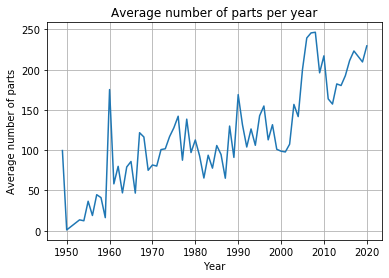

In [7]:
%matplotlib inline

# Read sets data as `sets` and review first 5 rows
sets = pd.read_csv('datasets/sets.csv')
print(sets.head())

# Create a summary of average number of parts by year: `parts_by_year`
parts_by_year = sets.groupby(["year"]).mean()

# Plot trends in average number of parts by year
from matplotlib import pyplot as plt
fig, ax = plt.subplots()
ax.plot(parts_by_year.index, parts_by_year.num_parts)

ax.set(xlabel='Year', ylabel='Average number of parts',
       title='Average number of parts per year')
ax.grid()

plt.show()


## 6. Lego Themes Over Years
<p>Lego toys are in market under several <a href="https://shop.lego.com/en-US/Themes">themes</a>. Let's have a look at the number of themes by year:</p>

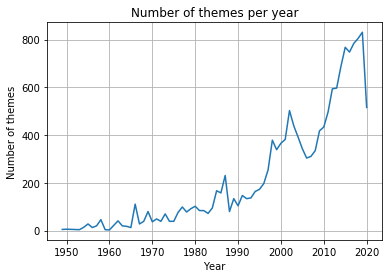

In [10]:
# themes_by_year: Number of themes shipped by year
themes_by_year = sets[["year", "theme_id"]].groupby("year", as_index=False).count()
themes_by_year.head()

# Plot trends in number of themes by year
from matplotlib import pyplot as plt
fig, ax = plt.subplots()
ax.plot(themes_by_year.year, themes_by_year.theme_id)

ax.set(xlabel='Year', ylabel='Number of themes',
       title='Number of themes per year')
ax.grid()

plt.show()

## 7. Wrap up
<p>Average number of parts per year has an increasing trend in the long run. While number of themes available per year shows similar change, there are some significant drops over time. </p>